In [ ]:
import time
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
def matrix_mult_cpu(n):
  with tf.device('/cpu:0'):
    matrix_A = tf.random.normal((n, n))
    matrix_B = tf.random.normal((n, n))
    return tf.linalg.matmul(matrix_A, matrix_B)

def matrix_mult_gpu(n):
  with tf.device('/device:GPU:0'):
    matrix_A = tf.random.normal((n, n))
    matrix_B = tf.random.normal((n, n))
    return tf.linalg.matmul(matrix_A, matrix_B)

In [ ]:
def convolution_cpu(n):
  with tf.device('/cpu:0'):
    random_image = tf.random.normal((n, 128, 128, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 8)(random_image)
    return tf.math.reduce_sum(net_cpu)

def convolution_gpu(n):
  with tf.device('/device:GPU:0'):
    random_image = tf.random.normal((n, 128, 128, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 8)(random_image)
    return tf.math.reduce_sum(net_gpu)

In [ ]:
def run_simulation_matrix_mult(n_list=[50, 100, 500, 1000, 2000, 5000, 7000, 10000], total_reps=10):
  cpu_times = []
  gpu_times = []
  for n in n_list:
    cpu_time = 0.0
    gpu_time = 0.0
    for _ in range(total_reps):
      t1 = time.time()
      matrix_mult_cpu(n)
      t2 = time.time()
      cpu_time += t2-t1

      t1 = time.time()
      matrix_mult_gpu(n)
      t2 = time.time()
      gpu_time += t2-t1
    
    cpu_times.append(cpu_time/total_reps)
    gpu_times.append(gpu_time/total_reps)
  print(cpu_times)
  print(gpu_times)
  plt.plot(n_list, cpu_times, label='cpu')
  plt.plot(n_list, gpu_times, label='gpu')
  plt.title('Tiempo de ejecución de multiplicación de matrices')
  plt.xlabel('Tamaño matriz')
  plt.ylabel('Tiempo (s)')
  plt.legend()
  plt.show()

In [ ]:
def run_simulation_convolutional(n_list=[20, 40, 60, 80, 100, 200], total_reps=10):
  cpu_times = []
  gpu_times = []
  for n in n_list:
    cpu_time = 0.0
    gpu_time = 0.0
    for _ in range(total_reps):
      t1 = time.time()
      convolution_cpu(n)
      t2 = time.time()
      cpu_time += t2-t1

      t1 = time.time()
      convolution_gpu(n)
      t2 = time.time()
      gpu_time += t2-t1
    
    cpu_times.append(cpu_time/total_reps)
    gpu_times.append(gpu_time/total_reps)
  print(cpu_times)
  print(gpu_times)
  plt.plot(n_list, cpu_times, label='cpu')
  plt.plot(n_list, gpu_times, label='gpu')
  plt.title('Tiempo de ejecución de convolución')
  plt.xlabel('Número de imágenes')
  plt.ylabel('Tiempo (s)')
  plt.legend()
  plt.show()

[0.0010200738906860352, 0.002778172492980957, 0.0148085355758667, 0.05828964710235596, 0.34017980098724365, 3.947255849838257]
[0.0005723237991333008, 0.000544428825378418, 0.0004699230194091797, 0.0005807876586914062, 0.0007401704788208008, 0.0007138252258300781]


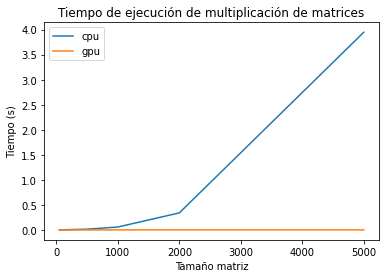

In [ ]:
run_simulation_matrix_mult(n_list=[50, 100, 500, 1000, 2000, 5000],total_reps=2)

[0.1040499210357666, 0.20643293857574463, 0.2947070598602295, 0.3910764455795288, 0.5083960294723511]
[0.004393339157104492, 0.0063664913177490234, 0.004772305488586426, 0.004526734352111816, 0.0049637556076049805]


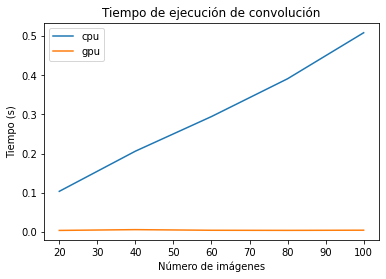

In [ ]:
run_simulation_convolutional(n_list=[20, 40, 60, 80, 100],total_reps=2)